In [1]:
## importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
##loading the dataset 
data = pd.read_csv("iphone_purchase_records.csv")
data

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [3]:
df = data.copy()
df

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


# Exploratory Data Analysis 

In [19]:
data.head()

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [20]:
data.tail()

,Gender,Age,Salary,Purchase Iphone
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0
399,Female,49,36000,1


In [22]:
data.shape

(400, 4)

In [4]:
df.isnull().sum()

Gender             0
Age                0
Salary             0
Purchase Iphone    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   Salary           400 non-null    int64 
 3   Purchase Iphone  400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [6]:
## summary statistics:
df.describe()

,Age,Salary,Purchase Iphone
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


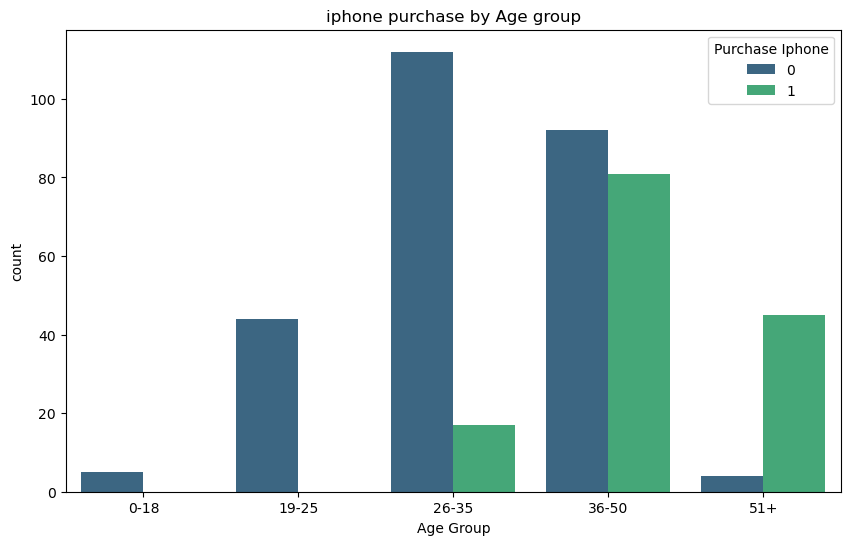

In [11]:
age_bin = [0,18,25,35,50,100]
age_labels = ['0-18','19-25','26-35','36-50','51+']
df['age_group']= pd.cut(df['Age'],bins = age_bin,labels=age_labels)

#ploting the bar graph
plt.figure(figsize=(10,6))
sns.countplot(x="age_group",data=df,hue = "Purchase Iphone",palette = 'viridis')
plt.title("iphone purchase by Age group")
plt.xlabel("Age Group")
plt.ylabel("count")
plt.show()

In [ ]:
##INFERENCE -- People who are 25+ year olds are more likely to purchase but people who are above 50 year old are purchasing
#more than people in their mid 30s & 40s

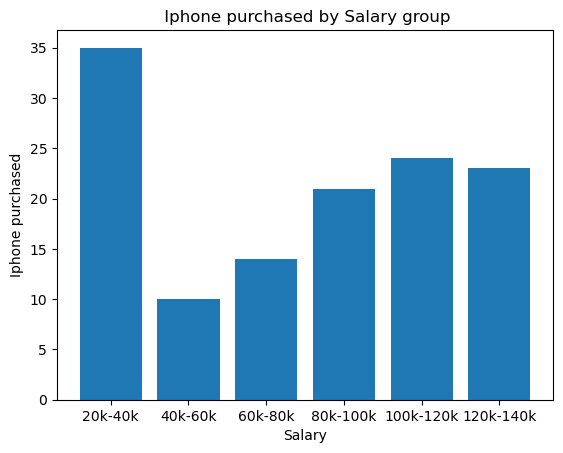

In [18]:
## visualizing what range of salary group purchase iphone
salary_bin = [20000,40000,60000,80000,100000,120000,140000]
salary_labels = ['20k-40k','40k-60k','60k-80k','80k-100k','100k-120k','120k-140k']
df['salary_group']= pd.cut(df['Salary'],bins = salary_bin,labels=salary_labels,right =False)

grouped_data = df.groupby('salary_group')['Purchase Iphone'].sum()

plt.bar(grouped_data.index,grouped_data)
plt.xlabel("Salary")
plt.ylabel("Iphone purchased")
plt.title(" Iphone purchased by Salary group")
plt.show()

In [ ]:
##INFERENCE -- It can be seen that the salary range of 20k-40k are the one who purchase iphone
#in comparison to other salary group

In [26]:
## Gender has string value so converting into numeric value
data['Gender'] = data['Gender'].astype('category').cat.codes

In [27]:
data

,Gender,Age,Salary,Purchase Iphone
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0
